# Apple Health Data Processor

## Dependencies and Libraries

In [1]:
#In order to fix these timezone errors, we will use the python timezone package and leverage a couple of simple functions to convert from UTC to our own timezone. We then set a few relevant date references
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Buenos Aires's time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/Argentina/Buenos_Aires'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/StepCount.csv")

In [4]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
102541,Lucas’s Apple Watch,8.5.1,"<<HKDevice: 0x283e8cb40>, name:Apple Watch, ma...",StepCount,count,2022-05-08 20:33:15 -0300,2022-05-08 20:17:33 -0300,2022-05-08 20:19:31 -0300,22
102542,Lucas’s iPhone,15.4.1,"<<HKDevice: 0x283e8ff70>, name:iPhone, manufac...",StepCount,count,2022-05-08 20:55:57 -0300,2022-05-08 20:42:32 -0300,2022-05-08 20:43:36 -0300,83
102543,Lucas’s iPhone,15.4.1,"<<HKDevice: 0x283e8ff70>, name:iPhone, manufac...",StepCount,count,2022-05-08 21:50:51 -0300,2022-05-08 21:39:48 -0300,2022-05-08 21:48:53 -0300,67
102544,Lucas’s iPhone,15.4.1,"<<HKDevice: 0x283e8ff70>, name:iPhone, manufac...",StepCount,count,2022-05-08 22:00:55 -0300,2022-05-08 21:49:52 -0300,2022-05-08 21:50:08 -0300,19
102545,Lucas’s iPhone,15.4.1,"<<HKDevice: 0x283e8ff70>, name:iPhone, manufac...",StepCount,count,2022-05-08 22:27:39 -0300,2022-05-08 22:16:16 -0300,2022-05-08 22:18:12 -0300,39


In [5]:
# parse out date and time elements as Buenos Aires time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [7]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Lucas’s Apple Watch,5.1.1,"<<HKDevice: 0x283e8e8f0>, name:Apple Watch, ma...",StepCount,count,2018-12-08 18:40:44 -0300,2018-12-08 18:29:58-03:00,2018-12-08 18:36:29 -0300,45,2018,2018-12,2018-12-08,8,15,5
1,Lucas’s Apple Watch,5.1.1,"<<HKDevice: 0x283e8e8f0>, name:Apple Watch, ma...",StepCount,count,2018-12-08 18:52:08 -0300,2018-12-08 18:51:03-03:00,2018-12-08 18:51:05 -0300,1,2018,2018-12,2018-12-08,8,15,5
2,Lucas’s Apple Watch,5.1.1,"<<HKDevice: 0x283e8e8f0>, name:Apple Watch, ma...",StepCount,count,2018-12-08 19:08:38 -0300,2018-12-08 18:59:30-03:00,2018-12-08 19:00:28 -0300,21,2018,2018-12,2018-12-08,8,15,5
3,Lucas’s Apple Watch,5.1.1,"<<HKDevice: 0x283e8e8f0>, name:Apple Watch, ma...",StepCount,count,2018-12-08 19:08:38 -0300,2018-12-08 19:00:28-03:00,2018-12-08 19:01:27 -0300,82,2018,2018-12,2018-12-08,8,16,5
4,Lucas’s Apple Watch,5.1.1,"<<HKDevice: 0x283e8e8f0>, name:Apple Watch, ma...",StepCount,count,2018-12-08 19:08:38 -0300,2018-12-08 19:01:27-03:00,2018-12-08 19:02:26 -0300,93,2018,2018-12,2018-12-08,8,16,5


In [8]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [9]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [10]:
steps_by_date.tail()   ##First, we group steps by the date and sum their value

,date,Steps
1243,2022-05-04,1338
1244,2022-05-05,797
1245,2022-05-06,7661
1246,2022-05-07,12170
1247,2022-05-08,1606


In [11]:
# steps_by_date.tail(10)   ##We then create a new data frame called “steps_by_date.” We can then see each date has a steps total and export it to CSV.
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

--# There is one problem though. This includes both step data from both the watch and phone. While other data points are unique, steps is a special example since it is collected on both the phone and watch. Let’s clean this up in the next section.

### Use Only Watch Steps, Remove Phone Steps

In [12]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [13]:
steps_device_by_year   ##As you can see, I have markedly different results on the phone and watch, and the combined results increases my step count by nearly 70%!

,year,sourceName,Steps
0,2018,Lucas’s Apple Watch,172958
1,2018,Lucas’s iPhone,165734
2,2019,Lucas’s Apple Watch,2433243
3,2019,Lucas’s iPhone,755185
4,2020,Lucas’s Apple Watch,1298423
5,2020,Lucas’s iPhone,919411
6,2021,Lucas’s Apple Watch,1051562
7,2021,Lucas’s iPhone,750253
8,2022,Lucas’s Apple Watch,368316
9,2022,Lucas’s iPhone,177233


In [14]:
steps.sourceName.unique()

array(['Lucas’s Apple\xa0Watch', 'Lucas’s iPhone'], dtype=object)

In [16]:
# drop phone steps
steps = steps[steps.sourceName == 'Lucas’s Apple Watch']
# steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow


## Rolling Average

<AxesSubplot:title={'center':'Daily step counts rolling mean over 10 days'}, xlabel='date'>

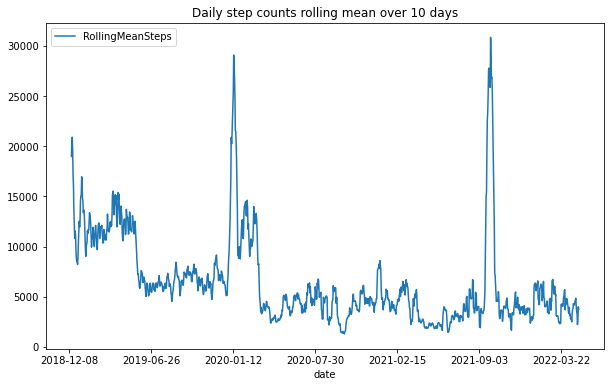

In [17]:
# we can clearly spot when I took my holidays 2020 jan to Thailand & 2021 Oct to Spain
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [18]:
# First, let’s create a day of the week column:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

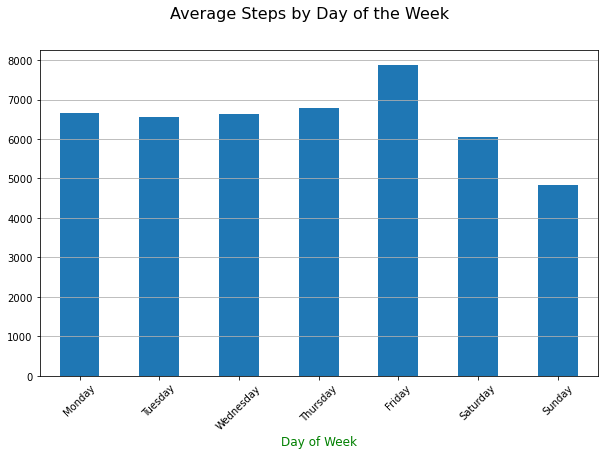

In [20]:
# We can then use some simple code to group the data by day of the week, get the day of the week mean:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='Green')

### After 2 years with COVID + Homeoffice its clear why I could't reach the 10K avg :(

## Weight visualizations

In [42]:
weight = pd.read_csv("data/BodyMass.csv")

In [43]:
# weight.columns

In [44]:
# parse out date and time elements as Shanghai time
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [45]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
0,Health,10.2.1,NaN,BodyMass,kg,2017-04-27 21:06:42 -0300,2017-04-27 21:06:42-03:00,2017-04-27 21:06:42 -0300,63,2017,2017-04,2017-04-27
1,Health,12.1.2,NaN,BodyMass,kg,2019-01-09 21:37:52 -0300,2019-01-09 21:37:00-03:00,2019-01-09 21:37:00 -0300,62,2019,2019-01,2019-01-09
2,Health,11.2.1,NaN,BodyMass,kg,2018-03-08 00:30:47 -0300,2018-03-08 00:30:47-03:00,2018-03-08 00:30:47 -0300,63,2018,2018-03,2018-03-07
3,Health,13.3.1,NaN,BodyMass,kg,2020-03-09 21:35:38 -0300,2020-03-09 21:35:00-03:00,2020-03-09 21:35:00 -0300,60,2020,2020-03,2020-03-09


In [46]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [47]:
# month_weight

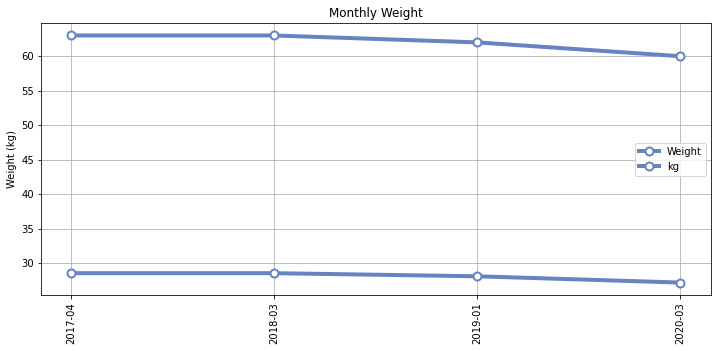

In [74]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (kg)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

## Heart Rate

In [52]:
resting = pd.read_csv("data/RestingHeartRate.csv")
len(resting)

1248

In [53]:
resting.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [54]:
resting.sourceName.unique()

array(['Lucas’s Apple\xa0Watch'], dtype=object)

In [55]:
# parse out date and time elements as Shanghai time
resting['startDate'] = pd.to_datetime(resting['startDate'])
resting['year'] = resting['startDate'].map(get_year)
resting['month'] = resting['startDate'].map(get_month)
resting['date'] = resting['startDate'].map(get_date)

In [56]:
# resting.tail(10)

<AxesSubplot:title={'center':'Resting HR'}, xlabel='date'>

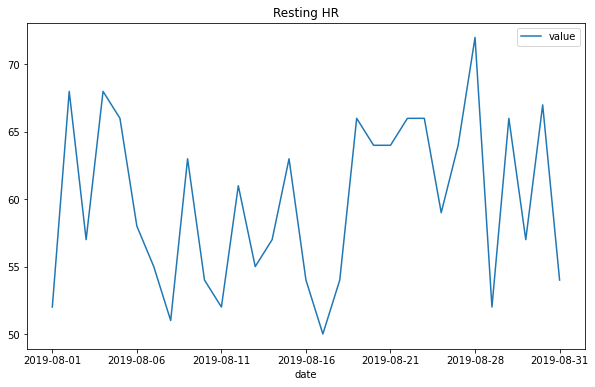

In [57]:
resting[resting.month == '2019-08'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [58]:
hr = pd.read_csv("data/HeartRate.csv")
len(hr)

302386

In [59]:
# hr.tail(10)

In [60]:
# parse out date and time elements as Shanghai time
hr['startDate'] = pd.to_datetime(hr['startDate'])
hr['year'] = hr['startDate'].map(get_year)
hr['month'] = hr['startDate'].map(get_month)
hr['hour'] = hr['startDate'].map(get_hour)
hr['date'] = hr['startDate'].map(get_date)

<AxesSubplot:title={'center':'HR'}, xlabel='startDate'>

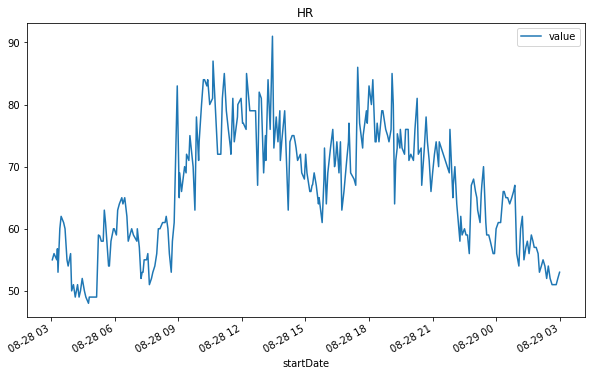

In [63]:
# plot a single day
test_date = '2020-08-28'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'HR', figsize=[10, 6])

------

# Sleep

In [75]:
sleep_raw = pd.read_csv("data/SleepAnalysis.csv")

In [76]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
3253,Lucas’s Apple Watch,8.5.1,NaN,SleepAnalysis,NaN,2022-05-06 09:01:30 -0300,2022-05-06 00:47:57 -0300,2022-05-06 00:49:27 -0300,HKCategoryValueSleepAnalysisAsleep
3254,Lucas’s Apple Watch,8.5.1,NaN,SleepAnalysis,NaN,2022-05-06 09:01:30 -0300,2022-05-06 00:50:27 -0300,2022-05-06 07:22:57 -0300,HKCategoryValueSleepAnalysisAsleep
3255,Lucas’s Apple Watch,8.5.1,NaN,SleepAnalysis,NaN,2022-05-06 09:01:30 -0300,2022-05-06 07:31:27 -0300,2022-05-06 08:24:27 -0300,HKCategoryValueSleepAnalysisAsleep
3256,Lucas’s Apple Watch,8.5.1,NaN,SleepAnalysis,NaN,2022-05-06 09:01:30 -0300,2022-05-06 08:30:27 -0300,2022-05-06 08:44:27 -0300,HKCategoryValueSleepAnalysisAsleep
3257,Lucas’s iPhone,15.4.1,NaN,SleepAnalysis,NaN,2022-05-06 09:01:28 -0300,2022-05-06 00:29:34 -0300,2022-05-06 08:52:24 -0300,HKCategoryValueSleepAnalysisInBed


In [77]:
# parse out date and time elements as Buenos Aires time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)